<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---

In [1]:
%matplotlib inline

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt


from skimage import measure
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
from skimage import io
from skimage.feature import graycomatrix, graycoprops

## Gray Value Co-occurrence Matrix as texture descriptor

Use the feature extracted from the GLC matrix to extract features that capture the characteristics of different textures. 

In [5]:
image_rgb = io.imread("../images/tma.jpg")
image = img_as_ubyte(rgb2gray(image_rgb))

In [6]:
PATCH_SIZE = 15

# select some patches from stroma areas of the tma image
stroma_locations = [(20, 20), (240, 20), (32, 370), (140, 460)]
stroma_patches = []
for loc in stroma_locations:
    stroma_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from nuclei areas of the image
gland_locations = [(210, 410), (150, 330), (290, 450), (450, 470)]
gland_patches = []
for loc in gland_locations:
    gland_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

### Display the image patches

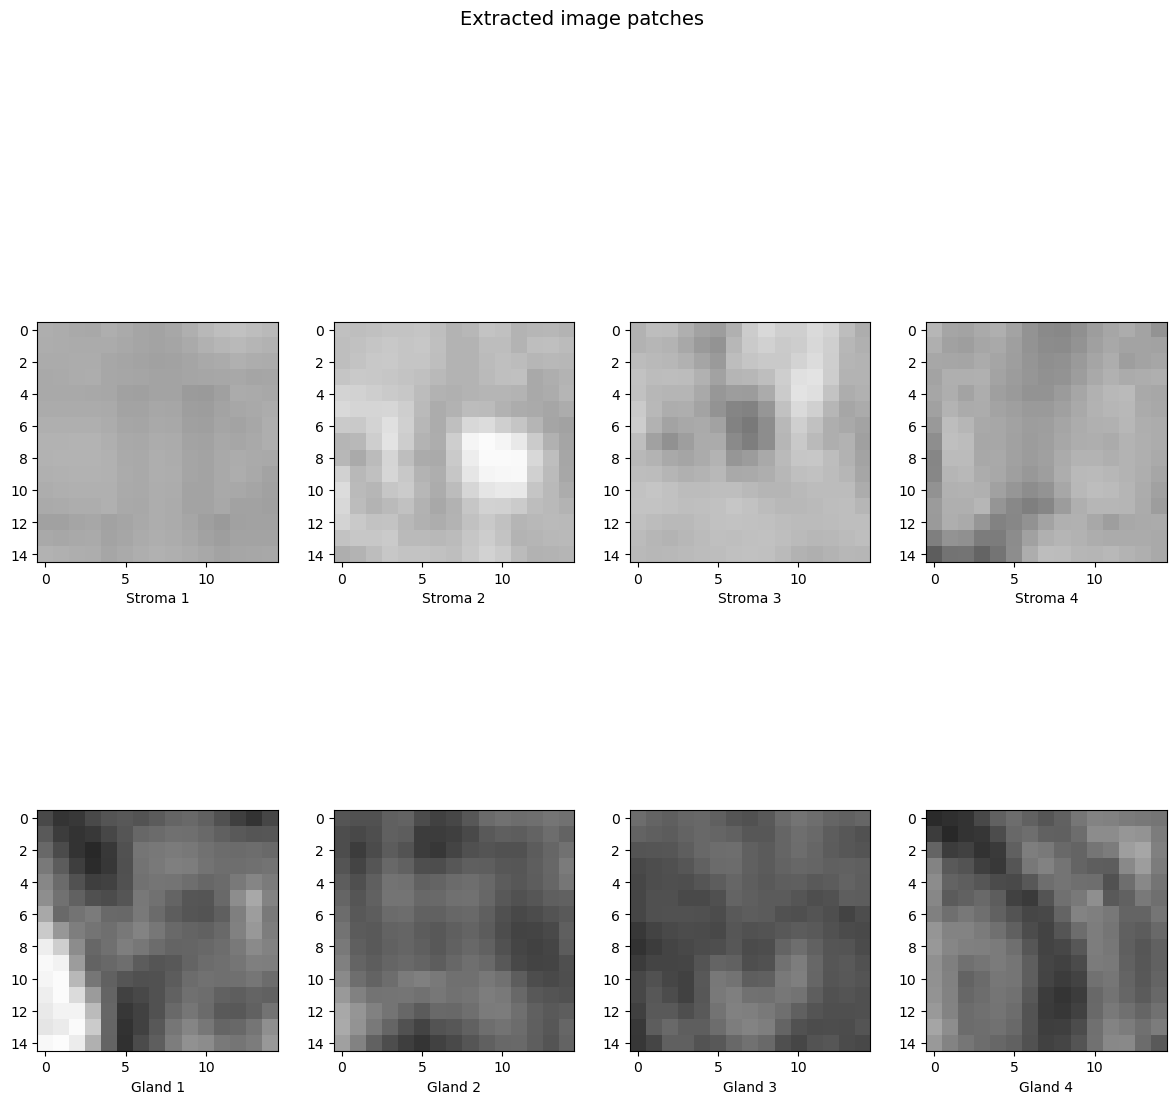

In [7]:
fig = plt.figure(figsize=(12, 12))

for i, patch in enumerate(stroma_patches):
    ax = fig.add_subplot(2, len(stroma_patches), i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Stroma %d' % (i + 1))

for i, patch in enumerate(gland_patches):
    ax = fig.add_subplot(2, len(stroma_patches), len(stroma_patches) + i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Gland %d' % (i + 1))


# display the patches and plot
fig.suptitle('Extracted image patches', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

### Compute GLCM properties for each patch

In [8]:
xs = []
ys = []
for patch in (stroma_patches + gland_patches):
    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256)
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

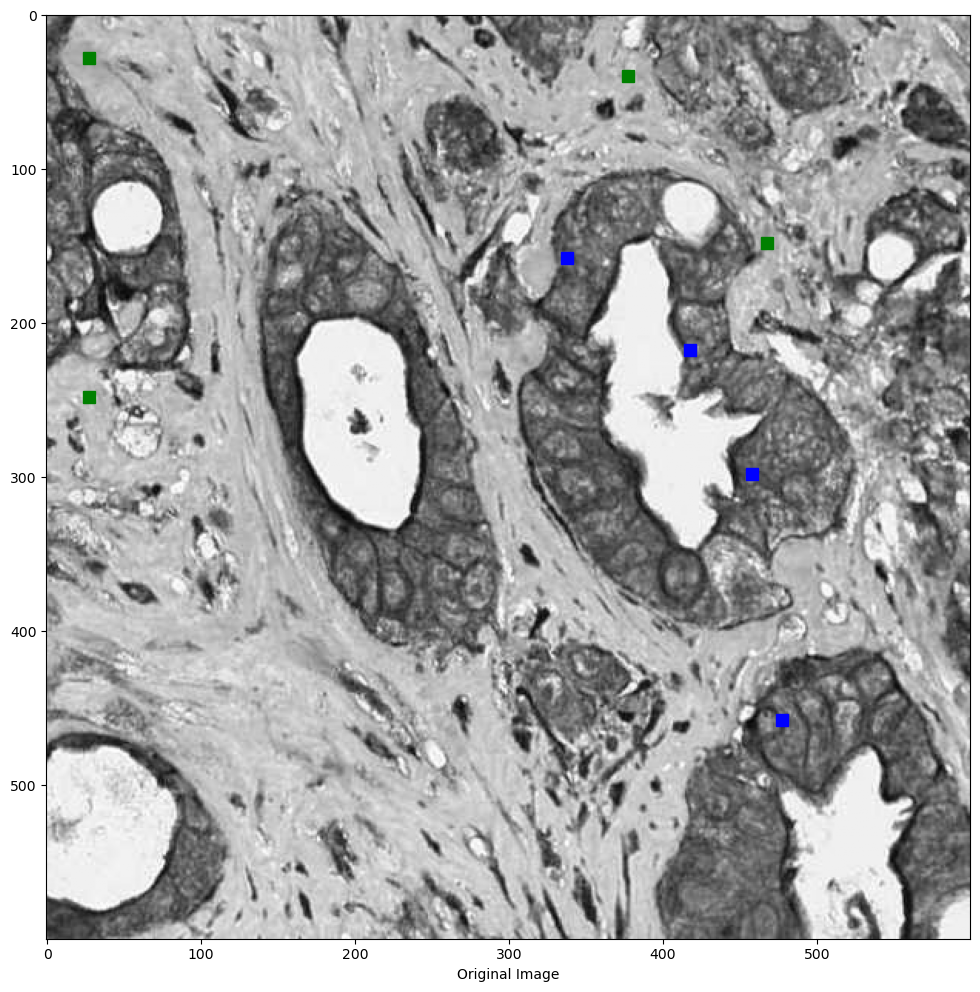

In [9]:
# create the figure
fig = plt.figure(figsize=(12, 12))

# display original image with locations of patches
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in stroma_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs', markersize=8)
for (y, x) in gland_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs', markersize=8)
ax.set_xlabel('Original Image')
ax.axis('image')

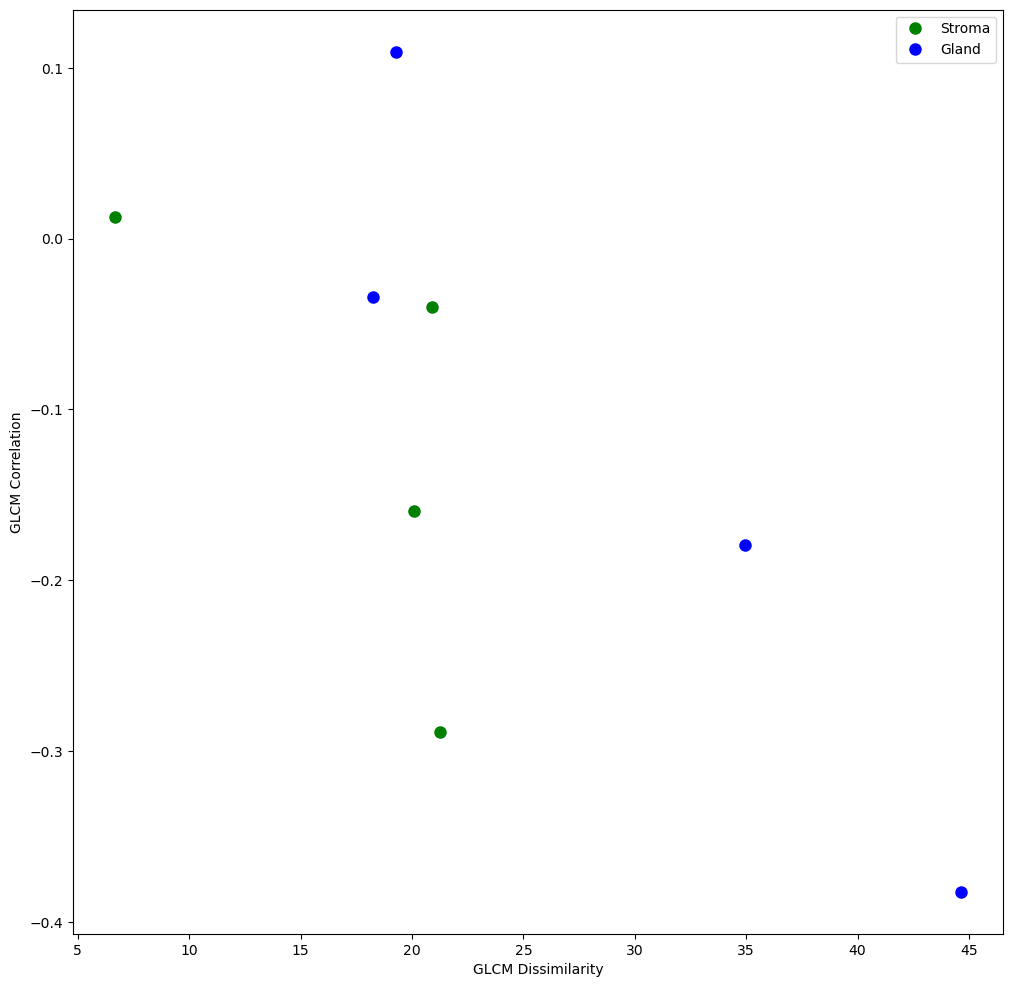

In [10]:
fig = plt.figure(figsize=(12, 12))

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs[:len(stroma_patches)], ys[:len(stroma_patches)], 'go', label='Stroma', markersize=8)
ax.plot(xs[len(gland_patches):], ys[len(gland_patches):], 'bo', label='Gland', markersize=8)
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

<div class="alert alert-block alert-success"> 
<b>Explore:</b> Try some other patches to test how stable the GLCM features are. 
</div>